<a href="https://colab.research.google.com/github/Isaiah-Essien/East-African-tours/blob/main/mobile_device_user_behaviour_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mobile Device User Behaviour Prediction

**Project Summary: Predicting Mobile Device User Behavior**
This project aims to analyze and classify mobile device user behavior based on patterns of usage metrics. Using a dataset of 700 samples with features such as app usage time, screen-on time, battery consumption, data usage, and demographic information, we develop a machine learning model to predict user behavior class (ranging from light to extreme usage).


**Key Objectives**
- Understand Usage Patterns: Examine how different metrics, like daily app usage time and screen-on time, vary across different user behavior classes.

- Build a Predictive Model: Train a model to classify users into behavior classes, helping to anticipate user needs and personalize mobile experiences.
- Provide Actionable Insights: Identify the features most influential in predicting user behavior to guide potential enhancements in mobile device management and user personalization.


**Steps in the Project**
- Data Loading and Preparation: Load and inspect the dataset, handling categorical variables (e.g., Device Model, Operating System, Gender) and any necessary data cleaning.
- Exploratory Data Analysis (EDA): Analyze key metrics to identify trends across user behavior classes, visualizing relationships between usage patterns and behavior classes.
- Model Training: Use a Random Forest classifier to predict user behavior class based on device usage features.
- Evaluation: Assess model accuracy with metrics such as classification report and confusion matrix, and identify areas for potential improvement.

In [65]:
### Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
import pickle


In [48]:
### Mount drive and load data
drive.mount('/content/drive')

# Load Data
data = pd.read_csv('/content/drive/MyDrive/Databases_assignment_G8/Task_4/user_behavior_dataset.csv')
print(data.head(10))



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   User ID        Device Model Operating System  App Usage Time min/day  \
0        1      Google Pixel 5          Android                     393   
1        2           OnePlus 9          Android                     268   
2        3        Xiaomi Mi 11          Android                     154   
3        4      Google Pixel 5          Android                     239   
4        5           iPhone 12              iOS                     187   
5        6      Google Pixel 5          Android                      99   
6        7  Samsung Galaxy S21          Android                     350   
7        8           OnePlus 9          Android                     543   
8        9  Samsung Galaxy S21          Android                     340   
9       10           iPhone 12              iOS                     424   

   Screen On Time hours/day  Battery Drain mA

In [49]:
# Replace internal spaces and special characters with underscores
data.columns = data.columns.str.strip().str.replace(r'[^\w\s]', '_', regex=True).str.replace(r'\s+', '_', regex=True)


In [50]:
### Check for basic information about the data

print(f'Number of rows: {data.shape[0]}')
print(f'Number of columns: {data.shape[1]}')
print(f'Data types: \n{data.dtypes}')
print(f'Descriptive statistics: \n{data.describe()}')
print(f'Unique values: \n{data.nunique()}')
print(f'Missing values: \n{data.isnull().sum()}')
print(f'Data Information: \n{data.info()}')

Number of rows: 700
Number of columns: 11
Data types: 
User_ID                       int64
Device_Model                 object
Operating_System             object
App_Usage_Time_min_day        int64
Screen_On_Time_hours_day    float64
Battery_Drain_mAh_day         int64
Number_of_Apps_Installed      int64
Data_Usage_MB_day             int64
Age                           int64
Gender                       object
User_Behavior_Class           int64
dtype: object
Descriptive statistics: 
         User_ID  App_Usage_Time_min_day  Screen_On_Time_hours_day  \
count  700.00000              700.000000                700.000000   
mean   350.50000              271.128571                  5.272714   
std    202.21688              177.199484                  3.068584   
min      1.00000               30.000000                  1.000000   
25%    175.75000              113.250000                  2.500000   
50%    350.50000              227.500000                  4.900000   
75%    525.25000    

<ipython-input-51-223249300b49>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='User_Behavior_Class', palette='viridis')


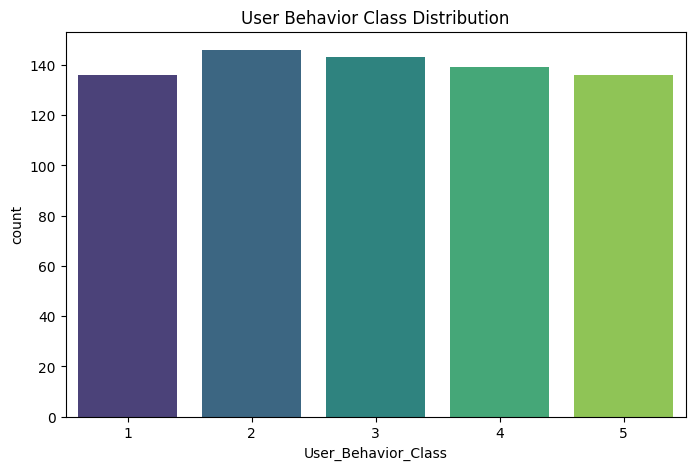

In [51]:
# Visualize the distribution of user behavior classes
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='User_Behavior_Class', palette='viridis')
plt.title('User Behavior Class Distribution')
plt.show()


<ipython-input-56-936e057d3eb3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='User_Behavior_Class', y='App_Usage_Time_min_day', palette='viridis')


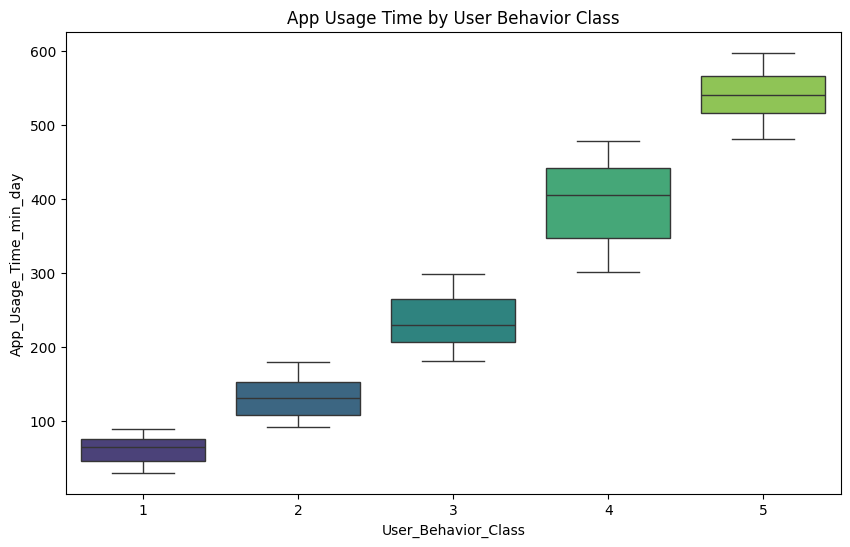

<ipython-input-56-936e057d3eb3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='User_Behavior_Class', y='Screen_On_Time_hours_day', palette='viridis')


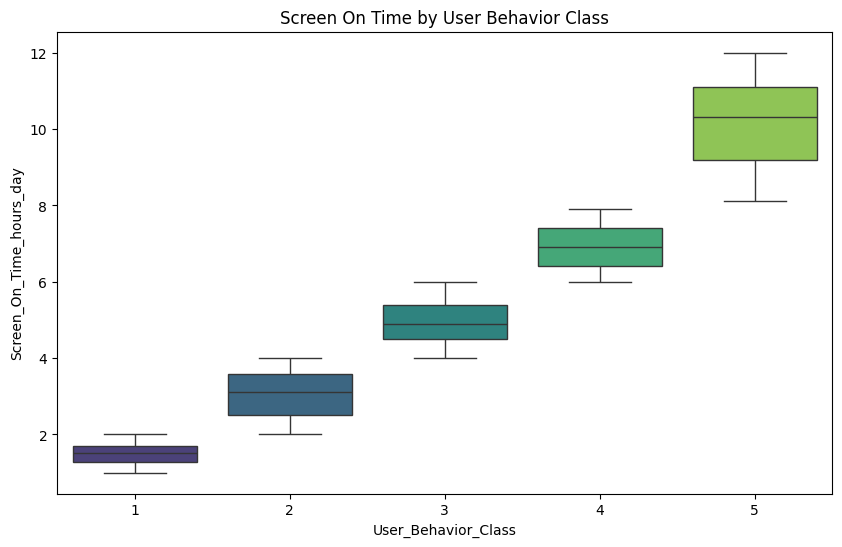

In [56]:
# Example: Average app usage time for each user behavior class
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='User_Behavior_Class', y='App_Usage_Time_min_day', palette='viridis')
plt.title('App Usage Time by User Behavior Class')
plt.show()

# Screen On Time by User Behavior Class
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='User_Behavior_Class', y='Screen_On_Time_hours_day', palette='viridis')
plt.title('Screen On Time by User Behavior Class')
plt.show()


In [57]:
data.columns

Index(['User_ID', 'Device_Model', 'Operating_System', 'App_Usage_Time_min_day',
       'Screen_On_Time_hours_day', 'Battery_Drain_mAh_day',
       'Number_of_Apps_Installed', 'Data_Usage_MB_day', 'Age', 'Gender',
       'User_Behavior_Class'],
      dtype='object')

In [60]:
# Drop unnecessary columns
data = data.drop(columns=['User_ID'])

# Label Encode categorical columns
label_encoder = LabelEncoder()
categorical_columns = ['Device_Model', 'Operating_System', 'Gender']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [61]:
data.head()

,Device_Model,Operating_System,App_Usage_Time_min_day,Screen_On_Time_hours_day,Battery_Drain_mAh_day,Number_of_Apps_Installed,Data_Usage_MB_day,Age,Gender,User_Behavior_Class
0,0,0,393,6.4,1872,67,1122,40,1,4
1,1,0,268,4.7,1331,42,944,47,0,3
2,3,0,154,4.0,761,32,322,42,1,2
3,0,0,239,4.8,1676,56,871,20,1,3
4,4,1,187,4.3,1367,58,988,31,0,3


In [62]:
# Define features and target variable
X = data.drop(columns=['User_Behavior_Class'])
y = data['User_Behavior_Class']


In [63]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [67]:
#save model
pickle.dump(model, open('/content/drive/MyDrive/Databases_assignment_G8/Task_4/user_behaviour_model.pkl', 'wb'))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



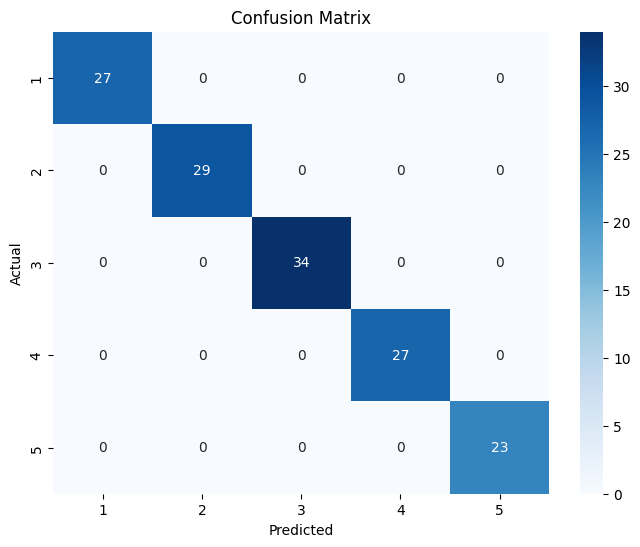

In [68]:
### Evaluate the model

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()